In [4]:
import pandas as pd
import numpy as np
import json

In [5]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [6]:
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
movies['genres'] = movies['genres'].apply(json.loads)

In [11]:
movies['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [12]:
movies['genres'][0][1]['name']

'Adventure'

In [13]:
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'genres'] = str(list1)

In [14]:
movies['genres']

0       ['Action', 'Adventure', 'Fantasy', 'Science Fi...
1                      ['Adventure', 'Fantasy', 'Action']
2                        ['Action', 'Adventure', 'Crime']
3                ['Action', 'Crime', 'Drama', 'Thriller']
4              ['Action', 'Adventure', 'Science Fiction']
                              ...                        
4798                      ['Action', 'Crime', 'Thriller']
4799                                ['Comedy', 'Romance']
4800           ['Comedy', 'Drama', 'Romance', 'TV Movie']
4801                                                   []
4802                                      ['Documentary']
Name: genres, Length: 4803, dtype: object

In [15]:
movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [16]:
# keywords
movies['keywords'] = movies['keywords'].apply(json.loads)

In [17]:
movies['keywords'][0][0]['name']

'culture clash'

In [18]:
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'keywords'] = str(list1)

In [19]:
movies['keywords'].head()

0    ['culture clash', 'future', 'space war', 'spac...
1    ['ocean', 'drug abuse', 'exotic island', 'east...
2    ['spy', 'based on novel', 'secret agent', 'seq...
3    ['dc comics', 'crime fighter', 'terrorist', 's...
4    ['based on novel', 'mars', 'medallion', 'space...
Name: keywords, dtype: object

In [20]:
# production_companies
movies['production_companies'] = movies['production_companies'].apply(json.loads)

In [21]:
movies['production_companies'][0][0]['name']

'Ingenious Film Partners'

In [22]:
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'production_companies'] = str(list1)

In [23]:
movies['production_companies'][0]

"['Ingenious Film Partners', 'Twentieth Century Fox Film Corporation', 'Dune Entertainment', 'Lightstorm Entertainment']"

In [24]:
# cast
credits['cast'] = credits['cast'].apply(json.loads)

In [25]:
credits['cast'][0]

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [26]:
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    c = 0
    for j in range(len(i)):
      # if c != 1:
      list1.append((i[j]['name']))
        # c += 1
       # the key 'name' contains the name of the genre
    credits.loc[index,'cast'] = str(list1)

In [27]:
credits['cast'][0]

"['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Stephen Lang', 'Michelle Rodriguez', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy', 'Peter Dillon', 'Kevin Dorman', 'Kelson Henderson', 'David Van Horn', 'Jacob Tomuri', 'Michael Blain-Rozgay', 'Jon Curry', 'Luke Hawker', 'Woody Schultz', 'Peter Mensah', 'Sonia Yee', 'Jahnel Curfman', 'Ilram Choi', 'Kyla Warren', 'Lisa Roumain', 'Debra Wilson', 'Chris Mala', 'Taylor Kibby', 'Jodie Landau', 'Julie Lamm', 'Cullen B. Madden', 'Joseph Brady Madden', 'Frankie Torres', 'Austin Wilson', 'Sara Wilson', 'Tamica Washington-Miller', 'Lucy Briant', 'Nathan Meister', 'Gerry Blair', 'Matthew Chamberlain', 'Paul Yates', 'Wray Wilson', 'James Gaylyn', 'Melvin Leno Clark III', 'Carvon Futrell', 'Brandon Jelkes', 'Micah Moch', 'Hanniyah Muhammad', 'Christopher Nolen', 'C

In [28]:
# crew
credits['crew'] = credits['crew'].apply(json.loads)

In [29]:
credits['crew'][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [30]:
for index,i in zip(credits.index,credits['crew']):
    list1 = []
    for j in range(len(i)):
      if i[j]['job'] == 'Director':
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
      else:
        continue
    credits.loc[index,'crew'] = str(list1)

In [31]:
credits.rename(columns = {'crew':'director'}, inplace = True)

In [32]:
credits.head(5)

,movie_id,title,cast,director
0,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",['James Cameron']
1,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",['Gore Verbinski']
2,206647,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",['Sam Mendes']
3,49026,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",['Christopher Nolan']
4,49529,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",['Andrew Stanton']


In [33]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [34]:
movies = movies.merge(credits, left_on='id', right_on='movie_id')

In [35]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'movie_id', 'title_y', 'cast', 'director'],
      dtype='object')

In [36]:
movies = movies[['id', 'original_title', 'genres', 'cast', 'vote_average', 'director', 'keywords']]

In [37]:
movies.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801, 4802],
           dtype='int64', length=4803)

In [38]:
movies.columns

Index(['id', 'original_title', 'genres', 'cast', 'vote_average', 'director',
       'keywords'],
      dtype='object')

In [39]:
# genres
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [40]:
movies['genres']

0       Action,Adventure,Fantasy,ScienceFiction
1                      Adventure,Fantasy,Action
2                        Action,Adventure,Crime
3                   Action,Crime,Drama,Thriller
4               Action,Adventure,ScienceFiction
                         ...                   
4798                      Action,Crime,Thriller
4799                             Comedy,Romance
4800               Comedy,Drama,Romance,TVMovie
4801                                           
4802                                Documentary
Name: genres, Length: 4803, dtype: object

In [41]:
movies['genres'] = movies['genres'].str.split(',')

In [42]:
movies['genres']

0       [Action, Adventure, Fantasy, ScienceFiction]
1                       [Adventure, Fantasy, Action]
2                         [Action, Adventure, Crime]
3                   [Action, Crime, Drama, Thriller]
4                [Action, Adventure, ScienceFiction]
                            ...                     
4798                       [Action, Crime, Thriller]
4799                               [Comedy, Romance]
4800               [Comedy, Drama, Romance, TVMovie]
4801                                              []
4802                                   [Documentary]
Name: genres, Length: 4803, dtype: object

In [43]:
# plot genres
import matplotlib.pyplot as plt
import seaborn as sns


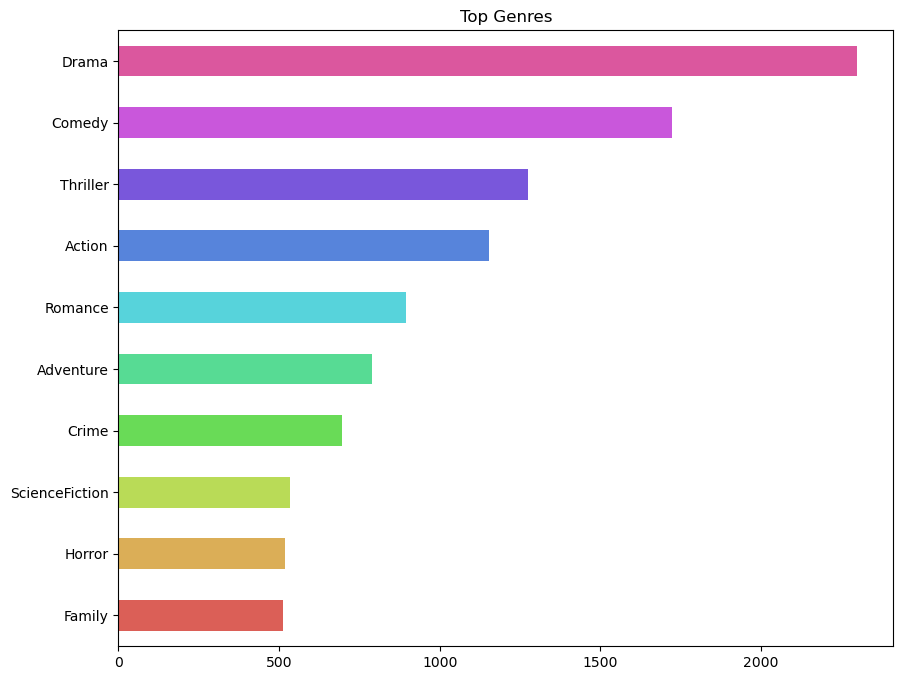

In [44]:
plt.subplots(figsize=(10,8))
movies['genres'].explode().value_counts(sort=True).nlargest(10).sort_values(ascending = True).plot.barh(color=sns.color_palette('hls',10))
plt.title('Top Genres')
plt.show()

In [45]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]

    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TVMovie',
 '']

In [46]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [47]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

In [48]:
movies

,id,original_title,genres,cast,vote_average,director,keywords,genres_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,['James Cameron'],"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",6.9,['Gore Verbinski'],"['ocean', 'drug abuse', 'exotic island', 'east...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",6.3,['Sam Mendes'],"['spy', 'based on novel', 'secret agent', 'seq...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","['Christian Bale', 'Michael Caine', 'Gary Oldm...",7.6,['Christopher Nolan'],"['dc comics', 'crime fighter', 'terrorist', 's...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",6.1,['Andrew Stanton'],"['based on novel', 'mars', 'medallion', 'space...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[Action, Crime, Thriller]","['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...",6.6,['Robert Rodriguez'],"['united states–mexico barrier', 'legs', 'arms...","[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4799,72766,Newlyweds,"[Comedy, Romance]","['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...",5.9,['Edward Burns'],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."
4800,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie]","['Eric Mabius', 'Kristin Booth', 'Crystal Lowe...",7.0,['Scott Smith'],"['date', 'love at first sight', 'narration', '...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."
4801,126186,Shanghai Calling,[],"['Daniel Henney', 'Eliza Coupe', 'Bill Paxton'...",5.7,['Daniel Hsia'],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [49]:
# for i,j in zip(movies['cast'],movies.index):
#     list2 = []
#     list2 = i[:4]
#     movies.loc[j,'cast'] = str(list2)
# movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
# movies['cast'] = movies['cast'].str.split(',')
# for i,j in zip(movies['cast'],movies.index):
#     list2 = []
#     list2 = i
#     list2.sort()
#     movies.loc[j,'cast'] = str(list2)
# movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
# castList = []
# for index, row in movies.iterrows():
#     cast = row["cast"]
    
#     for i in cast:
#         if i not in castList:
#             castList.append(i)
#             movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
# movies['cast_bin'].head()

In [50]:
# genres
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')

In [51]:
movies['cast']

0       [SamWorthington, ZoeSaldana, SigourneyWeaver, ...
1       [JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...
2       [DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...
3       [ChristianBale, MichaelCaine, GaryOldman, Anne...
4       [TaylorKitsch, LynnCollins, SamanthaMorton, Wi...
                              ...                        
4798    [CarlosGallardo, JaimedeHoyos, PeterMarquardt,...
4799    [EdwardBurns, KerryBishé, MarshaDietlein, Cait...
4800    [EricMabius, KristinBooth, CrystalLowe, GeoffG...
4801    [DanielHenney, ElizaCoupe, BillPaxton, AlanRuc...
4802    [DrewBarrymore, BrianHerzlinger, CoreyFeldman,...
Name: cast, Length: 4803, dtype: object

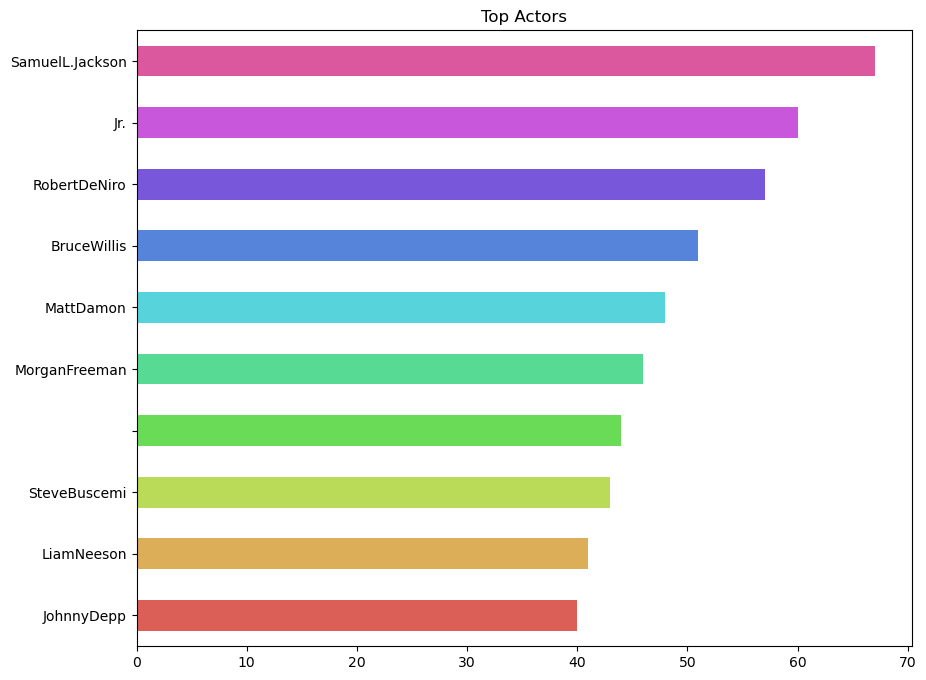

In [52]:
plt.subplots(figsize=(10,8))
movies['cast'].explode().value_counts(sort=True).nlargest(10).sort_values(ascending = True).plot.barh(color=sns.color_palette('hls',10))
plt.title('Top Actors')
plt.show()

In [53]:
# for i,j in zip(movies['cast'],movies.index):
#   list2 = []
#   list2 = i[:4]
#   movies.loc[j, 'cast'] = str(list2)

# movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
# movies['cast'] = movies['cast'].str.split(',')

# # for i,j in zip(movies['cast'],movies.index):
# #     list2 = []
# #     list2 = i
# #     list2.sort()
# #     movies.loc[j,'cast'] = str(list2)

# # movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
# # movies['cast'] = movies['cast'].str.split(',')
# # # castList = []

# # # for index, row in movies.iterrows():
# # #   cast = row['cast']

# # #   for i in cast:
# # #     if i not in castList:
# # #       castList.append(i)
# # #       movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
# # # movies['cast_bin'].head()

In [54]:
movies['cast']

0       [SamWorthington, ZoeSaldana, SigourneyWeaver, ...
1       [JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...
2       [DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...
3       [ChristianBale, MichaelCaine, GaryOldman, Anne...
4       [TaylorKitsch, LynnCollins, SamanthaMorton, Wi...
                              ...                        
4798    [CarlosGallardo, JaimedeHoyos, PeterMarquardt,...
4799    [EdwardBurns, KerryBishé, MarshaDietlein, Cait...
4800    [EricMabius, KristinBooth, CrystalLowe, GeoffG...
4801    [DanielHenney, ElizaCoupe, BillPaxton, AlanRuc...
4802    [DrewBarrymore, BrianHerzlinger, CoreyFeldman,...
Name: cast, Length: 4803, dtype: object

In [55]:
# castList = []

# for index, row in movies.iterrows():
#   cast = row["cast"]
    
#   for i in cast:
#       if i not in castList:
#           castList.append(i)
#       movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
# # movies['cast_bin'].head()

In [56]:
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j,'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')


In [57]:
movies['cast']

0       [SamWorthington, ZoeSaldana, SigourneyWeaver, ...
1       [JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...
2       [DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...
3       [ChristianBale, MichaelCaine, GaryOldman, Anne...
4       [TaylorKitsch, LynnCollins, SamanthaMorton, Wi...
                              ...                        
4798    [CarlosGallardo, JaimedeHoyos, PeterMarquardt,...
4799    [EdwardBurns, KerryBishé, MarshaDietlein, Cait...
4800    [EricMabius, KristinBooth, CrystalLowe, GeoffG...
4801     [DanielHenney, ElizaCoupe, BillPaxton, AlanRuck]
4802    [DrewBarrymore, BrianHerzlinger, CoreyFeldman,...
Name: cast, Length: 4803, dtype: object

In [58]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [59]:
castList

['SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'StephenLang',
 'JohnnyDepp',
 'OrlandoBloom',
 'KeiraKnightley',
 'StellanSkarsgård',
 'DanielCraig',
 'ChristophWaltz',
 'LéaSeydoux',
 'RalphFiennes',
 'ChristianBale',
 'MichaelCaine',
 'GaryOldman',
 'AnneHathaway',
 'TaylorKitsch',
 'LynnCollins',
 'SamanthaMorton',
 'WillemDafoe',
 'TobeyMaguire',
 'KirstenDunst',
 'JamesFranco',
 'ThomasHadenChurch',
 'ZacharyLevi',
 'MandyMoore',
 'DonnaMurphy',
 'RonPerlman',
 'RobertDowneyJr.',
 'ChrisHemsworth',
 'MarkRuffalo',
 'ChrisEvans',
 'DanielRadcliffe',
 'RupertGrint',
 'EmmaWatson',
 'TomFelton',
 'BenAffleck',
 'HenryCavill',
 'GalGadot',
 'AmyAdams',
 'BrandonRouth',
 'KevinSpacey',
 'KateBosworth',
 'JamesMarsden',
 'OlgaKurylenko',
 'MathieuAmalric',
 'JudiDench',
 'ArmieHammer',
 'WilliamFichtner',
 'HelenaBonhamCarter',
 'MichaelShannon',
 'KevinCostner',
 'BenBarnes',
 'WilliamMoseley',
 'AnnaPopplewell',
 'SkandarKeynes',
 'PenélopeCruz',
 'IanMcShane',
 'KevinMcNally'

In [60]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [61]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
movies['cast_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: cast_bin, dtype: object

In [62]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)

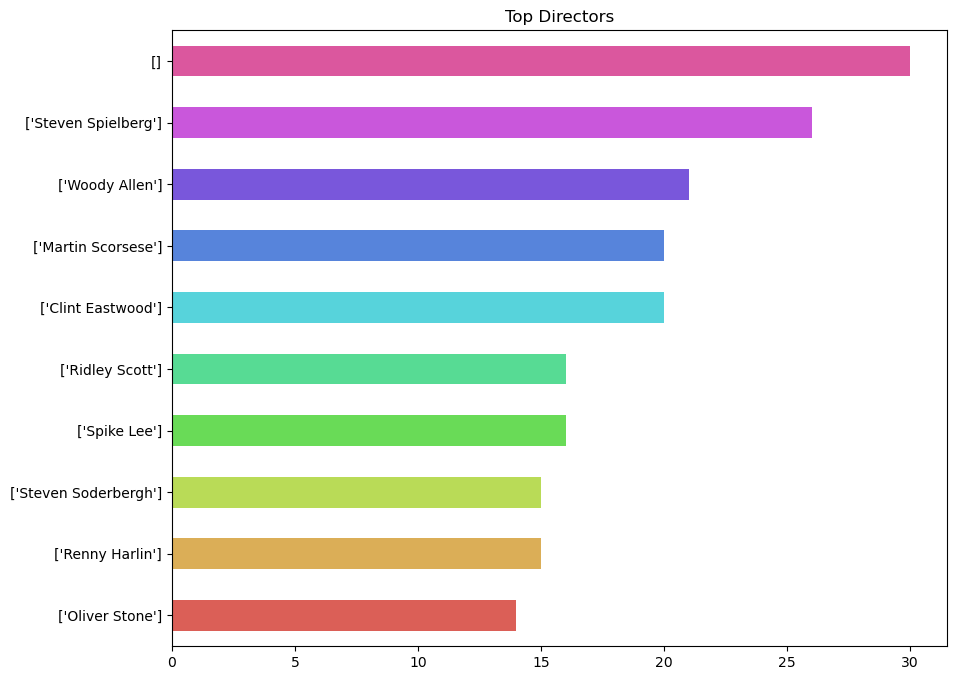

In [63]:
plt.subplots(figsize=(10,8))
movies['director'].explode().value_counts(sort=True).nlargest(10).sort_values(ascending = True).plot.barh(color=sns.color_palette('hls',10))
plt.title('Top Directors')
plt.show()

In [64]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [65]:
def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [66]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
movies.head()

,id,original_title,genres,cast,vote_average,director,keywords,genres_bin,cast_bin,director_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",7.2,['James Cameron'],"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",6.9,['Gore Verbinski'],"['ocean', 'drug abuse', 'exotic island', 'east...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",6.3,['Sam Mendes'],"['spy', 'based on novel', 'secret agent', 'seq...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[ChristianBale, MichaelCaine, GaryOldman, Anne...",7.6,['Christopher Nolan'],"['dc comics', 'crime fighter', 'terrorist', 's...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",6.1,['Andrew Stanton'],"['based on novel', 'mars', 'medallion', 'space...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [67]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [68]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


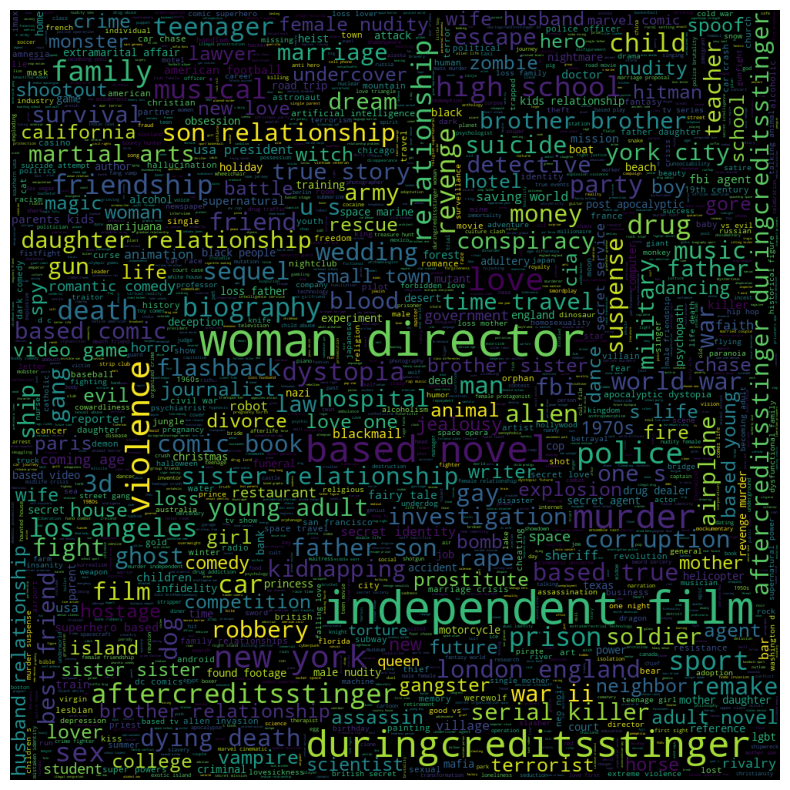

In [69]:
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')
words=movies['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [70]:
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')

In [71]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [72]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [73]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
movies = movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies = movies[movies['director']!='']

In [74]:
movies.shape

(4740, 11)

In [75]:
from scipy import spatial
def Similarity(movieId1, movieId2):

  a = movies.iloc[movieId1]
  b = movies.iloc[movieId2]
    
  genresA = a['genres_bin']
  genresB = b['genres_bin']
    
  genreDistance = spatial.distance.cosine(genresA, genresB)
#   genreDistance = genreDistance0
#   genreDistance = spatial.
    
  scoreA = a['cast_bin']
  scoreB = b['cast_bin']
  scoreDistance = spatial.distance.cosine(scoreA, scoreB)
#   scoreDistance = 1 - scoreDistance0
    
  directA = a['director_bin']
  directB = b['director_bin']
  directDistance = spatial.distance.cosine(directA, directB)
#   directDistance = 1 - directDistance0
    
  wordsA = a['words_bin']
  wordsB = b['words_bin']
  wordsDistance = spatial.distance.cosine(wordsA, wordsB)
#   wordsDistance = 1 - wordsDistance0
#   return genreDistance  + wordsDistance
  return genreDistance + directDistance + scoreDistance + wordsDistance

    

In [76]:
Similarity(3,160) #

3.7958758547680684

In [77]:
print(movies.iloc[3])
print(movies.iloc[160])

id                                                            49026
original_title                                The Dark Knight Rises
genres                             [Action, Crime, Drama, Thriller]
cast              [ChristianBale, MichaelCaine, GaryOldman, Anne...
vote_average                                                    7.6
director                                      ['Christopher Nolan']
keywords          [batman, burglar, catburglar, catwoman, cover-...
genres_bin        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
director_bin      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 3, dtype: object
id                                                            82702
original_title                           How to Train Your Dragon 2
genres            [Fantasy, Action, Adventure, Animation, Comedy...
cast              [JayBar

In [78]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin','words_bin']]
movies.head()

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,['James Cameron'],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",1,['Gore Verbinski'],"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Spectre,"[Action, Adventure, Crime]",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...",2,['Sam Mendes'],"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...",3,['Christopher Nolan'],"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,John Carter,"[Action, Adventure, ScienceFiction]",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,['Andrew Stanton'],"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [79]:
import operator

def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [82]:
predict_score('The Notebook')

Selected Movie:  The Notebook

Recommended Movies: 

My Sister's Keeper | Genres: 'Drama' | Rating: 7.1
The Other Woman | Genres: 'Comedy','Romance' | Rating: 6.2
John Q | Genres: 'Drama','Thriller','Crime' | Rating: 7.0
The Vow | Genres: 'Drama','Romance' | Rating: 7.0
Hope Floats | Genres: 'Drama','Romance' | Rating: 5.8
Blue Valentine | Genres: 'Drama','Romance' | Rating: 6.9
Two Lovers | Genres: 'Drama','Romance' | Rating: 6.6
Poetic Justice | Genres: 'Drama','Romance' | Rating: 6.9
Frida | Genres: 'Drama','Romance' | Rating: 7.3
The Bridges of Madison County | Genres: 'Drama','Romance' | Rating: 7.3


The predicted rating for The Notebook is: 6.810000
The actual rating for The Notebook is 7.700000
